In [ ]:
#pip install nba-api

In [32]:
from nba_api.stats.static import players
import nba_api.stats.endpoints
from nba_api.stats.static import teams
from nba_api.stats.endpoints import shotchartdetail
from nba_api.stats.library.parameters import ContextMeasureSimple, LastNGames, LeagueID, Month, Period, SeasonTypeAllStar, AheadBehindNullable, ClutchTimeNullable, EndPeriodNullable, EndRangeNullable, GameSegmentNullable, LocationNullable, OutcomeNullable, PlayerPositionNullable, PointDiffNullable, PositionNullable, RangeTypeNullable, SeasonNullable, SeasonSegmentNullable, StartPeriodNullable, StartRangeNullable, ConferenceNullable, DivisionNullable

In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [34]:
BBplayers = players.get_players()
BBteams = teams.get_teams()

In [35]:
durant = [player for player in BBplayers if player['full_name'] == 'Kevin Durant'][0]
print(durant["id"])
lakers = [name for name in BBteams if name['full_name']=='Oklahoma City Thunder'][0]
lakers_id = lakers['id']
print(lakers_id)

201142
1610612760


In [36]:
durant = shotchartdetail.ShotChartDetail(player_id='201142',team_id=1610612760, season_nullable='2014-15')

In [37]:
NewDF=durant.get_data_frames()

In [38]:
df = NewDF[0]
list(df)

['GRID_TYPE',
 'GAME_ID',
 'GAME_EVENT_ID',
 'PLAYER_ID',
 'PLAYER_NAME',
 'TEAM_ID',
 'TEAM_NAME',
 'PERIOD',
 'MINUTES_REMAINING',
 'SECONDS_REMAINING',
 'EVENT_TYPE',
 'ACTION_TYPE',
 'SHOT_TYPE',
 'SHOT_ZONE_BASIC',
 'SHOT_ZONE_AREA',
 'SHOT_ZONE_RANGE',
 'SHOT_DISTANCE',
 'LOC_X',
 'LOC_Y',
 'SHOT_ATTEMPTED_FLAG',
 'SHOT_MADE_FLAG',
 'GAME_DATE',
 'HTM',
 'VTM']

In [39]:
df

,GRID_TYPE,GAME_ID,GAME_EVENT_ID,PLAYER_ID,PLAYER_NAME,TEAM_ID,TEAM_NAME,PERIOD,MINUTES_REMAINING,SECONDS_REMAINING,...,SHOT_ZONE_AREA,SHOT_ZONE_RANGE,SHOT_DISTANCE,LOC_X,LOC_Y,SHOT_ATTEMPTED_FLAG,SHOT_MADE_FLAG,GAME_DATE,HTM,VTM
0,Shot Chart Detail,0021400258,22,201142,Kevin Durant,1610612760,Oklahoma City Thunder,1,10,28,...,Right Side(R),24+ ft.,23,236,6,1,1,20141202,NOP,OKC
1,Shot Chart Detail,0021400258,55,201142,Kevin Durant,1610612760,Oklahoma City Thunder,1,7,5,...,Left Side Center(LC),16-24 ft.,16,-119,119,1,1,20141202,NOP,OKC
2,Shot Chart Detail,0021400258,236,201142,Kevin Durant,1610612760,Oklahoma City Thunder,2,7,32,...,Left Side(L),16-24 ft.,16,-160,45,1,1,20141202,NOP,OKC
3,Shot Chart Detail,0021400258,363,201142,Kevin Durant,1610612760,Oklahoma City Thunder,3,10,9,...,Right Side Center(RC),24+ ft.,25,157,203,1,1,20141202,NOP,OKC
4,Shot Chart Detail,0021400258,381,201142,Kevin Durant,1610612760,Oklahoma City Thunder,3,7,53,...,Center(C),Less Than 8 ft.,0,0,1,1,1,20141202,NOP,OKC
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
233,Shot Chart Detail,0021400795,486,201142,Kevin Durant,1610612760,Oklahoma City Thunder,4,6,1,...,Left Side(L),8-16 ft.,15,-138,66,1,1,20150211,OKC,MEM
234,Shot Chart Detail,0021400801,20,201142,Kevin Durant,1610612760,Oklahoma City Thunder,1,9,31,...,Center(C),24+ ft.,25,7,250,1,1,20150219,OKC,DAL
235,Shot Chart Detail,0021400801,42,201142,Kevin Durant,1610612760,Oklahoma City Thunder,1,7,39,...,Left Side(L),16-24 ft.,16,-150,75,1,1,20150219,OKC,DAL
236,Shot Chart Detail,0021400801,154,201142,Kevin Durant,1610612760,Oklahoma City Thunder,1,0,41,...,Center(C),24+ ft.,24,37,241,1,1,20150219,OKC,DAL


In [40]:
from matplotlib.patches import Circle, Rectangle, Arc

def draw_court(ax=None, color='black', lw=0.7, outer_lines=False):
    # If an axes object isn't provided to plot onto, just get current one
    if ax is None:
        ax = plt.gca()

    # Create the various parts of an NBA basketball court

    # Create the basketball hoop
    # Diameter of a hoop is 18" so it has a radius of 9", which is a value
    # 7.5 in our coordinate system
    hoop = Circle((0, 0), radius=7.5, linewidth=lw, color=color, fill=False)

    # Create backboard
    backboard = Rectangle((-30, -7.5), 60, -1, linewidth=lw, color=color)

    # The paint
    # Create the outer box 0f the paint, width=16ft, height=19ft
    outer_box = Rectangle((-80, -47.5), 160, 190, linewidth=lw, color=color,
                          fill=False)

    # Create free throw top arc
    top_free_throw = Arc((0, 142.5), 120, 120, theta1=0, theta2=180,
                         linewidth=lw, color=color, fill=False)
    # Create free throw bottom arc
    bottom_free_throw = Arc((0, 142.5), 120, 120, theta1=180, theta2=0,
                            linewidth=lw, color=color, linestyle='dashed')
    # Restricted Zone, it is an arc with 4ft radius from center of the hoop
    restricted = Arc((0, 0), 80, 80, theta1=0, theta2=180, linewidth=lw,
                     color=color)

    # Three point line
    # Create the side 3pt lines, they are 14ft long before they begin to arc
    corner_three_a = Rectangle((-220, -47.5), 0, 140, linewidth=lw,
                               color=color)
    corner_three_b = Rectangle((220, -47.5), 0, 140, linewidth=lw, color=color)
    # 3pt arc - center of arc will be the hoop, arc is 23'9" away from hoop
    # I just played around with the theta values until they lined up with the 
    # threes
    three_arc = Arc((0, 0), 475, 475, theta1=22, theta2=158, linewidth=lw,
                    color=color)

    # Center Court
    center_outer_arc = Arc((0, 422.5), 120, 120, theta1=180, theta2=0,
                           linewidth=lw, color=color)

    # List of the court elements to be plotted onto the axes
    court_elements = [hoop, backboard, outer_box, top_free_throw,
                      bottom_free_throw, restricted, corner_three_a,
                      corner_three_b, three_arc, center_outer_arc]

    if outer_lines:
        # Draw the half court line, baseline and side out bound lines
        outer_lines = Rectangle((-250, -47.5), 500, 470, linewidth=lw,
                                color=color, fill=False)
        court_elements.append(outer_lines)

    # Add the court elements onto the axes
    for element in court_elements:
        ax.add_patch(element)

    return ax

In [56]:
def shotchart_volume(name, team, season):
    player_list = [player for player in BBplayers if player['full_name'] == str(name)][0]
    player_id = player_list["id"]
    team_list = [name for name in BBteams if name['full_name']== str(team)][0]
    team_id = team_list['id']
    
    shotchart = shotchartdetail.ShotChartDetail(player_id=str(player_id),team_id=int(team_id), season_nullable=str(season))
    
    chart_frames = shotchart.get_data_frames()
    df = chart_frames[0]
    
    x = df["LOC_X"]
    y = df["LOC_Y"]
    
    cmap=plt.cm.gist_heat_r
    joint_shot_chart = sns.jointplot(df.LOC_X, df.LOC_Y, stat_func=None,
                                 kind='hex', space=0, color=cmap(.2), cmap=cmap)

    joint_shot_chart.fig.set_size_inches(6,5.5)
    ax = joint_shot_chart.ax_joint
    draw_court(ax)
    ax.set_xlim(-250,250)
    ax.set_ylim(422.5, -47.5)
    ax.set_xlabel(f'{name} FGA \n{season} - {team}')
    ax.set_ylabel('')
    ax.tick_params(labelbottom='off', labelleft='off')
    ax.set_xticks([])
    ax.set_yticks([])
    plt.show()

In [42]:
def shotchart(name, team, season):
    player_list = [player for player in BBplayers if player['full_name'] == str(name)][0]
    player_id = player_list["id"]
    team_list = [name for name in BBteams if name['full_name']== str(team)][0]
    team_id = team_list['id']
    
    shotchart = shotchartdetail.ShotChartDetail(player_id=str(player_id),team_id=int(team_id), season_nullable=str(season))
    
    chart_frames = shotchart.get_data_frames()
    df = chart_frames[0]
    
    x = df["LOC_X"]
    y = df["LOC_Y"]
    
    plt.scatter(x,y, s=5, c="sandybrown")
    draw_court(outer_lines=True)
    plt.title(f'{name} FGA \n{season} - {team}')
    plt.xlim(-250,250)
    plt.ylim(422.5, -47.5)
    plt.xlabel('')
    plt.ylabel('')
    plt.xticks([])
    plt.yticks([])
    plt.show()

In [29]:
seasons = ["2009-10", "2010-11", "2011-12","2012-13","2013-14","2014-15", "2015-16", "2016-17", "2017-18", "2018-19", "2019-20"]
five =  ["2015-16", "2016-17", "2017-18", "2018-19", "2019-20"]
three = ["2017-18", "2018-19", "2019-20"]
two = ["2018-19", "2019-20"]

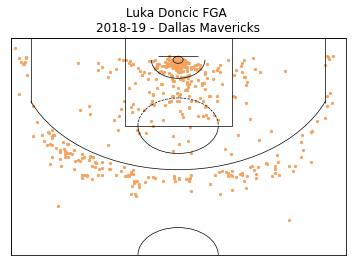

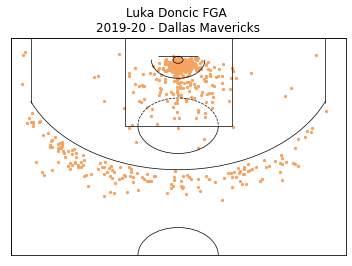

In [54]:
for season in two:
    shotchart("Luka Doncic", "Dallas Mavericks", season)

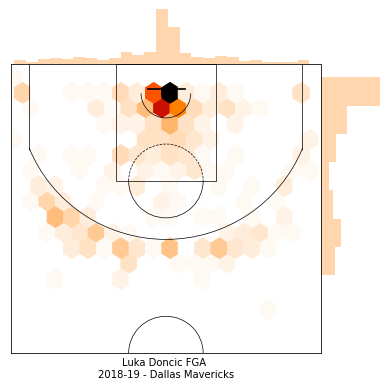

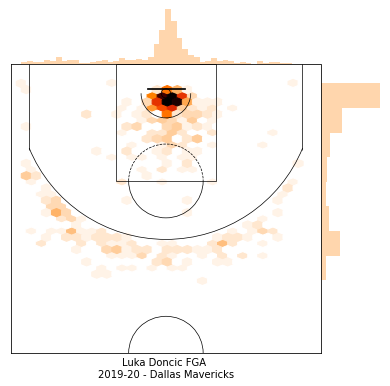

In [57]:
for season in two:
    shotchart_volume("Luka Doncic", "Dallas Mavericks", season)